# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

We will examine a data set containing 200 observations. The data set has 3 variables:

1. $y$: the outcome of interest.
2. $x1$: first predictor.
3. $x2$: second predictor.

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [1]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

#### Before you start...

Recall that L1 loss function (sum of magnitudes, used for LAD model):

$$L_1(\theta) = \sum_{i=1}^{n} \lvert {y_i-\hat{y_i}} \rvert$$

L2 loss function (RSS, residual sum of squares, used for OLS model):

$$L_2(\theta) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2$$


## Part 1
### Question 1.1:  /10 points


Read the `my_dataset.csv` file as a `pandas.DataFrame` and (1) change column names $x1$ and $x2$ to pred_1 and pred_2, respectively (2) print the first 10 rows. Remove the 5th observation since its pred_1 value is an outlier. Using the resulted data set from the previous step, for the 5th observation replace its pred_1 value (i.e., NAN) with 9.5. Print the first 10 rows of the final data set. Plot a scatterplot for every pairwise combination (scatterplot matrix), and briefly discuss the relationships between the variables. Based on your findings, discuss whether a simple linear regression is appropriate here or not.

In [ ]:
# YOUR CODE HERE

In [3]:
# Read in the data with pandas
my_data = pd.read_csv('my_dataset.csv')

# change column names and look at the first few rows

my_data = my_data.rename(columns = {'x1':'pred_1', 'x2':'pred_2'})

print(my_data.head(10))

# remove the 5th observation since its pred_1 value is an outlier

my_data = my_data.drop(index=4)

my_data = my_data.reset_index(drop=True)

# using the resulted data set from previous step, replace pred_1 value (i.e., NAN) with 9.5 for the 5th observation

my_data.iloc[4, 1] = 9.5

my_data.head(10)

# 3 pts
# 1 pt deduction for each missing part

           y  pred_1  pred_2
0  25.265621     3.6     3.1
1  63.512826     8.1     9.7
2  25.441710     4.7     6.4
3  79.286388     9.0     5.6
4  36.271320   100.0     5.2
5  86.271320     NaN     4.6
6   3.015506     1.4     9.0
7  36.834794     5.8     4.3
8  80.558765     9.1     3.6
9  45.601815     6.0     2.5


y  pred_1  pred_2
0  25.265621     3.6     3.1
1  63.512826     8.1     9.7
2  25.441710     4.7     6.4
3  79.286388     9.0     5.6
4  86.271320     9.5     4.6
5   3.015506     1.4     9.0
6  36.834794     5.8     4.3
7  80.558765     9.1     3.6
8  45.601815     6.0     2.5
9  33.299944     5.1     2.5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9989531a90>,
      dtype=object)

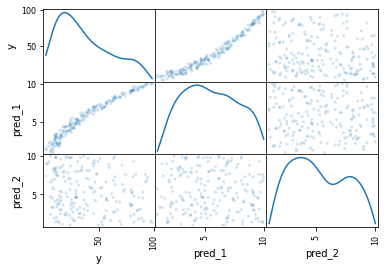

In [5]:
# create the scatterplot matrix with density plot
pd.plotting.scatter_matrix(my_data, alpha = 0.2, diagonal='kde')

# 4 pts

**Written answer: What do you see here? Discuss your findings**

A: There is a nonlinear relationship (strong correlation) between y and pred_1. This indicates that a
polynomial regression may perform better than a simple linear regression. We cannot see a clear specific relationship between
y and pred_2, pred_1 and pred_2. [3 pts]

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values. 

Report $\hat{\mathbf{y}}$. 

What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [ ]:
# Your code here.

In [4]:
def linearModelPredict(b,X):
    # Numpy does matrix multiplication in a few ways.
    # The dot or @ operator are most common.
    # b should always have the same dimensionality as X has columns.
    yp = np.dot(X,b) 

    return yp

# Test 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
print("X@b is %s" % str(linearModelPredict(b,X)))

# 3pt

X@b is [ 0.1 -0.2  0.7]


In [6]:
# Note that b can either be a 2d array or a 1d array and the multiplication will still work
# This requires you to be cognizant about shapes and keep track of the dimension.
# Here are some examples

# b is a 2d array
print('Using a 2d array...')
X = np.eye(2)
b = 2*np.ones(2).reshape(-1,1)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 2d array
print("X@b is \n ", linearModelPredict(b,X))


# b is a 1d array
print('\n\nUsing a 1d array...')
X = np.eye(2)
b = 2*np.ones(2)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 1d array
print("X@b is \n ", linearModelPredict(b,X))


# 2pt 

Using a 2d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [[2.]
 [2.]]
X@b is 
  [[2.]
 [2.]]


Using a 1d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [2. 2.]
X@b is 
  [2. 2.]


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2]) 
```

Report the loss and the gradient. 


In [ ]:
# Your code here.

In [7]:
def linearModelLossRSS(b,X,y):
    # The loss is really a function of b.  The b changes, the X and y stay fixed.
    # Make predictions
    predY = linearModelPredict(b,X)

    # Compute residuals.  This is an array.  The dimension of res will depend on if
    # b is 1d or 2d.  If b is 2d, predY will be 2d, and so res will be 2d due to something
    # called "array broadcasting".
    
    res = y-predY
    # Simply sum up the squared residuals.  This is the value of our loss.
    residual_sum_of_squares = sum(res**2) 
    
    # Because res is a vector, we can take the product of res with X.
    # Since X is two dimensional because it is a design matrix, this results in a
    # 2d array.  The gradient has three elements because there are three parameters.
    gradient=-2*np.dot(res,X)

    return (residual_sum_of_squares, gradient)

# 8 points the correct function.

In [8]:
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2])
rss, grad =linearModelLossRSS(b,X,y)

print("RSS is", rss)
print("gradient:\n", grad)

# 4 points the examples.

RSS is 0.6918750000000002
gradient:
 [1.65  3.45  4.275]


**Written answer**: To minimize the loss, do you need increase or decrease the value of the parameters? 

A: The gradient is positive for all three parameters, therefore they need to be decreased to minimize the cost. [3 points the right answer]

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the $R^2$. 

Test the function with the values: 
```
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
y = np.array([1.3,0.3,2])
```

Report best parameters and the fitted $R^2$ 


In [10]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    # Because we know b has to have the some dimension as X has columns,
    # We can use the number of columns to determine the size of betas
    # In this case, we use a 2d array
    nrows,ncols = X.shape
    betas=np.zeros((ncols,1))
    # Optimize the loss
    RES = so.minimize(lossfcn,betas,args=(X,y),jac=True, options={'disp': True})
    # Obtain estimates from the optimizer
    estimated_betas=RES.x 
    # Compute goodness of fit.
    diff = y-np.mean(y)
    TSS = sum(diff**2)
    RSS,deriv = linearModelLossRSS(estimated_betas,X,y)
    R2 = 1-RSS/TSS 

    return (estimated_betas,R2)


X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
y = np.array([1.3,0.3,2])
beta , R2 = linearModelFit(X,y)

print("Betas are", beta)
print("R\u00b2:\n", R2)

# 5 points for betas and 5 points for r2

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Betas are [-0.65000159 -0.30000055  1.30000129]
R²:
 0.9999999999996051


### Question 1.5: /15 points

Use the above functions to fit your model to the my_data. Use $y$ as the target variable and pred_1 as the predictor. Then use your model and the fitted parameters to make predictions along a grid of equally spaced values for the pred_1 variable. Note that, these new values must be within the original range of the pred_1 variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally spaced values (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


Optimization terminated successfully.
         Current function value: 6953.752030
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7


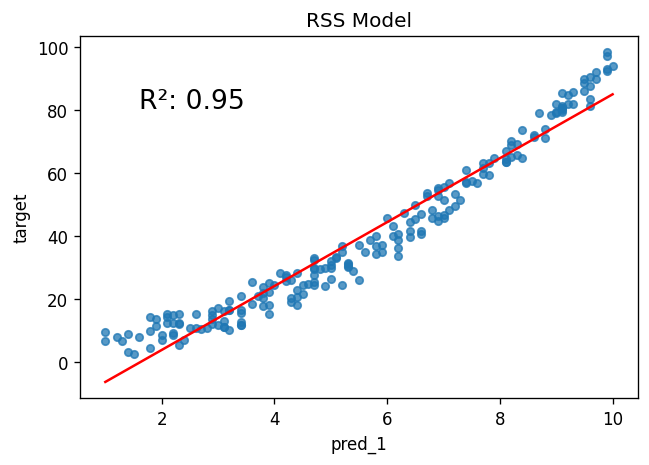

In [12]:
# Fit the data 
y = my_data.y.values
pred_1 = my_data.pred_1.values
N = pred_1.size
X = np.c_[np.ones(N), pred_1]
betas, R2 = linearModelFit(X,y)

# Create new data
pred_grid = np.linspace(pred_1.min(), pred_1.max(), 100)
# Turn it into a design matrix
Xn = np.c_[np.ones(pred_grid.size), pred_grid]

# Compute predictions with the new data and estimated coefficients
yn = linearModelPredict(betas, Xn)

fig, ax = plt.subplots(dpi = 120)
my_data.plot.scatter(x='pred_1', y='y', alpha=0.75, ax=ax)
ax.set_xlabel('pred_1')
ax.set_ylabel('target')

ax.plot(pred_grid, yn, color = 'red')
ax.annotate('R\u00b2: {R2}'.format(R2=round(R2, 2)), 
            xy=(0.2, 0.8), 
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)

ax.set_title('RSS Model')

plt.show()

# 5 points for fitted line (some have incorrect fitted line plotted starting with X.min() = 1)
# 5 points for scatter plots with a fitted line
# 5 points deducted if R2 was not reported
# students are required to calculate R2 manually here

## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2]) 
```

Report the loss and the gradient. 

In [13]:
def linearModelLossLAD(b,X,y):
    # Same concept as before, different loss
    predY = linearModelPredict(b,X)
    res = y-predY
    sres = np.sign(res); 
    sum_abs_dev = sum(abs(res))
    # Note the gradients are computed using the sign of the residuals
    grad =- (np.dot(sres,X))

    return (sum_abs_dev,grad)

X = np.array([[1,0,1.5],[1,-1,0.5],[1,2,2.5]])
b = np.array([0.1,0.3,0.85])
y = np.array([1.3,0.3,2]) 
lad, grad =linearModelLossLAD(b,X,y)

print("LAD is", lad)
print("gradient:\n", grad)
# If the gradient is not correct or not reported, deduct 5pts

LAD is 0.9750000000000001
gradient:
 [1.  3.  3.5]


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced values for pred_1.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



         Current function value: 947.483439
         Iterations: 7
         Function evaluations: 76
         Gradient evaluations: 73
[-17.76826618  10.33659494]


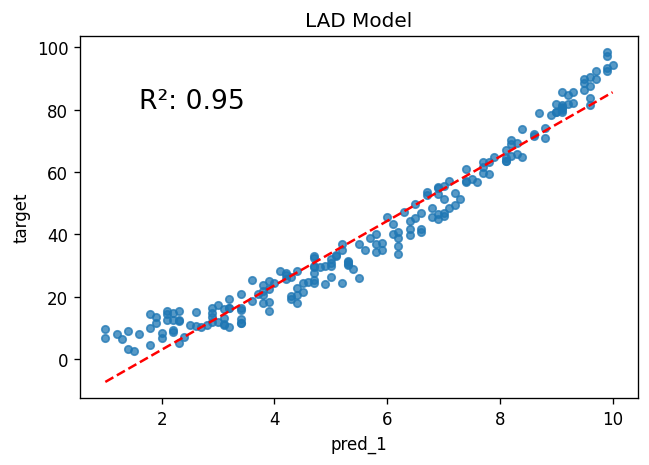

In [14]:
# Same as above
y = my_data.y.values
pred_1 = my_data.pred_1.values
N = pred_1.size
X = np.c_[np.ones(N), pred_1]
betas, R2 = linearModelFit(X, y, lossfcn=linearModelLossLAD)
print(betas)

pred_grid = np.linspace(pred_1.min(), pred_1.max(), 100)
Xn = np.c_[np.ones(pred_grid.size), pred_grid]
yn = linearModelPredict(betas, Xn)

fig, ax = plt.subplots(dpi = 120)
my_data.plot.scatter(x='pred_1', y='y', alpha=0.75, ax=ax)
ax.set_xlabel('pred_1')
ax.set_ylabel('target')

ax.plot(pred_grid, yn, color = 'red', linestyle = '--')
ax.annotate('R\u00b2: {R2}'.format(R2=round(R2, 2)), 
            xy=(0.2, 0.8), 
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)

ax.set_title('LAD Model')

# Display the image
plt.show()

# 8 points
# We do not double penalize if they made wrong gradient calculation in the previous question

Written answer: The LAD fit does not give as much weight to the outliers as the OLS fit. The $R^2$ value is identical, however. One would normally expect OLS to be slightly higher than LAD due to the optimization function being optimized. [2 points]

### Question 2.3: /15 points

Now we will use all data for the fit. Fit an OLS model to the my_data with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.  In no more than two sentences, comment on the $R^2$ values from `sklearn` and the $R^2$ values from your models. Are they similar?

In [15]:
y = my_data.y
X = my_data[['pred_1', 'pred_2']]
model = linear_model.LinearRegression().fit(X, y)

print(f'OLS R\u00b2: {model.score(X,y).round(2)}')
print(f'intercept: {model.intercept_}')
print(f'coefficients: {model.coef_}')
# 10 points
# If they did only with pred_1 as predictor deduct all the points
# 1 mark deducted if they add a column of ones before fitting the LinearRegression() as the function add the column of ones by default.

OLS R²: 0.96
intercept: -9.511249114860405
coefficients: [10.09468235 -1.23868899]


Written answer: The $R^2$ now is 0.96, which is very close to the 0.95 when pred_1 was used as the only predictor in the model. This suggest that pred_1 is the most important predictor. [5 pts]